In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data = pd.read_csv('data.csv',decimal=",")

In [3]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [4]:
data.shape

(737453, 24)

In [5]:
data.columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate'],
      dtype='object')

In [6]:
data.isnull().sum()

date                            0
% Iron Feed                     0
% Silica Feed                   0
Starch Flow                     0
Amina Flow                      0
Ore Pulp Flow                   0
Ore Pulp pH                     0
Ore Pulp Density                0
Flotation Column 01 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 07 Air Flow    0
Flotation Column 01 Level       0
Flotation Column 02 Level       0
Flotation Column 03 Level       0
Flotation Column 04 Level       0
Flotation Column 05 Level       0
Flotation Column 06 Level       0
Flotation Column 07 Level       0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null object
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non-null fl

In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
date                            737453 non-null datetime64[ns]
% Iron Feed                     737453 non-null float64
% Silica Feed                   737453 non-null float64
Starch Flow                     737453 non-null float64
Amina Flow                      737453 non-null float64
Ore Pulp Flow                   737453 non-null float64
Ore Pulp pH                     737453 non-null float64
Ore Pulp Density                737453 non-null float64
Flotation Column 01 Air Flow    737453 non-null float64
Flotation Column 02 Air Flow    737453 non-null float64
Flotation Column 03 Air Flow    737453 non-null float64
Flotation Column 04 Air Flow    737453 non-null float64
Flotation Column 05 Air Flow    737453 non-null float64
Flotation Column 06 Air Flow    737453 non-null float64
Flotation Column 07 Air Flow    737453 non-null float64
Flotation Column 01 Level       737453 non

In [10]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [11]:
data.index = data['date']

In [12]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [13]:
X = data.index

In [14]:
iron = data["% Iron Concentrate"].values

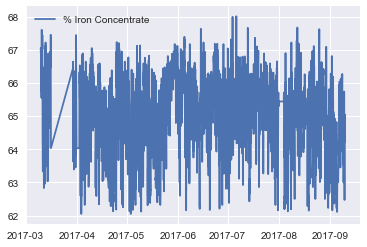

In [15]:
plt.plot(X,data["% Iron Concentrate"])
plt.legend()

In [16]:
silica = data["% Silica Concentrate"].values

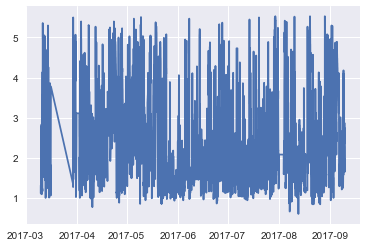

In [17]:
plt.plot(X,silica)

In [18]:
df = data[:100000]

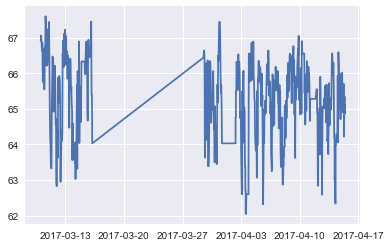

In [19]:
plt.plot(df.index,df["% Iron Concentrate"])

In [20]:
df2 = data[26814:126814]

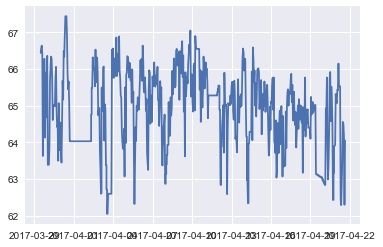

In [21]:
plt.plot(df2.index,df2["% Iron Concentrate"])

In [22]:
df2.shape

(100000, 24)

In [23]:
np.random.seed(7)

In [24]:
sns.set(style="ticks", color_codes=True)

In [25]:
df2[:100].shape

(100, 24)

# correlation

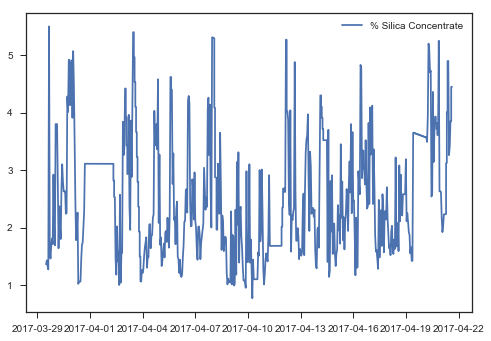

In [39]:
plt.plot(df2[df2.columns[0]],df2[df2.columns[23]])
plt.legend()

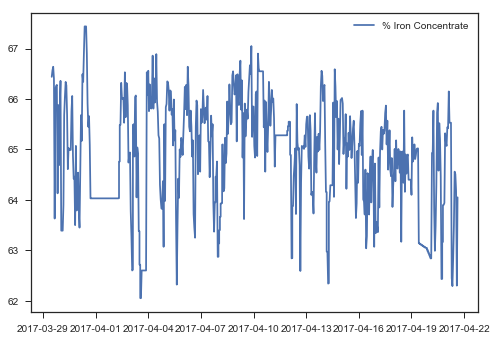

In [40]:
plt.plot(df2[df2.columns[0]],df2[df2.columns[22]])
plt.legend()

# %Iron Concentrate vs different attributes

F:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


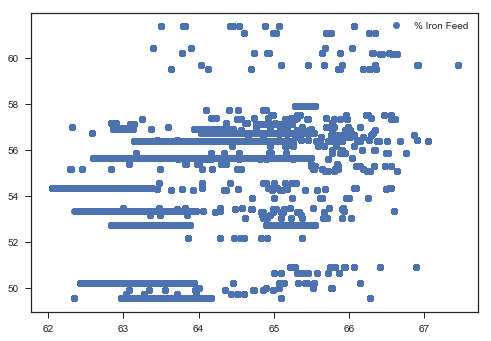

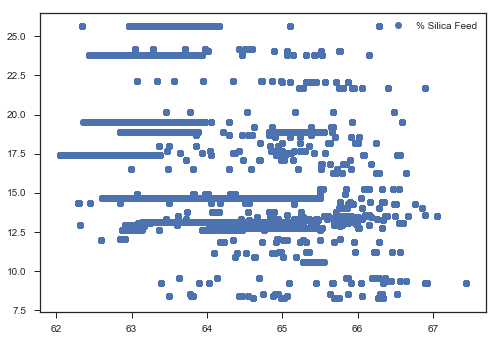

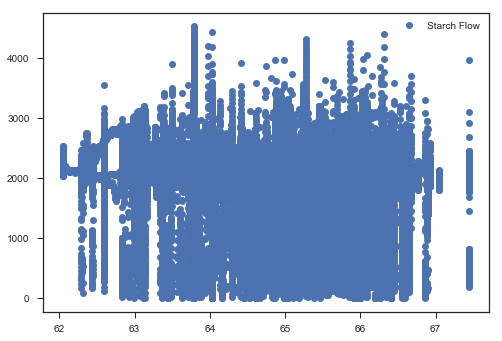

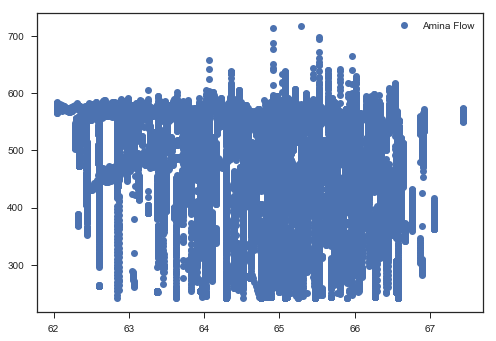

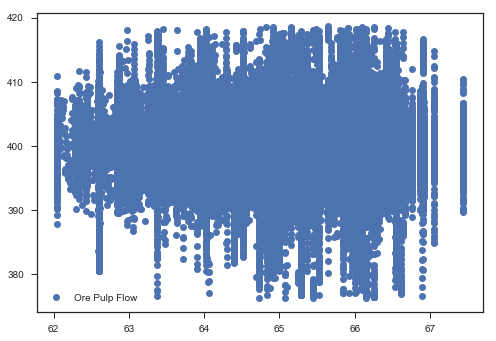

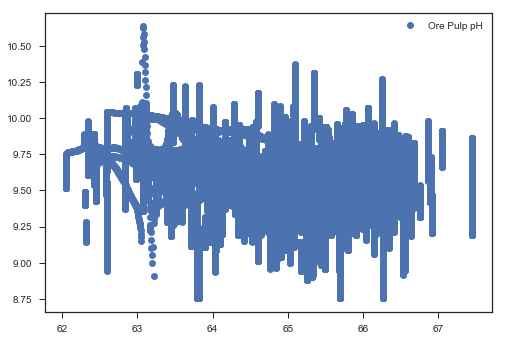

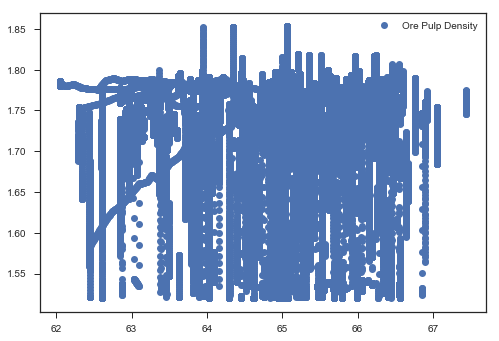

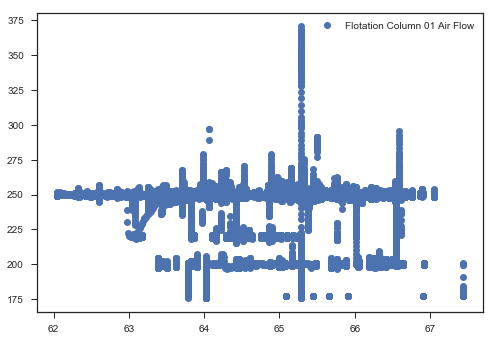

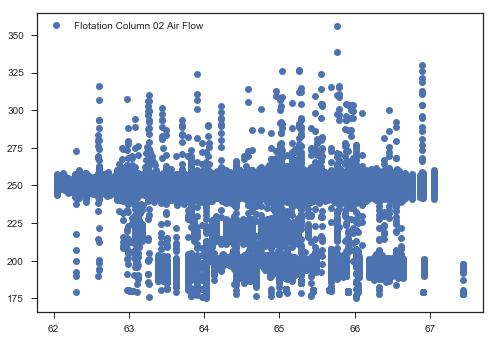

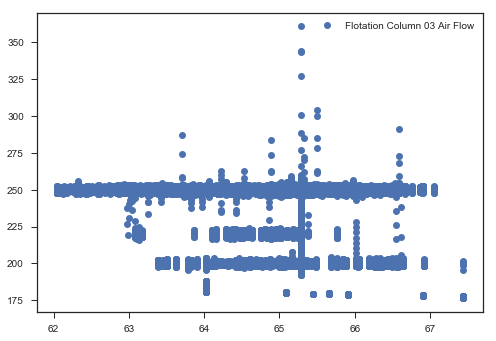

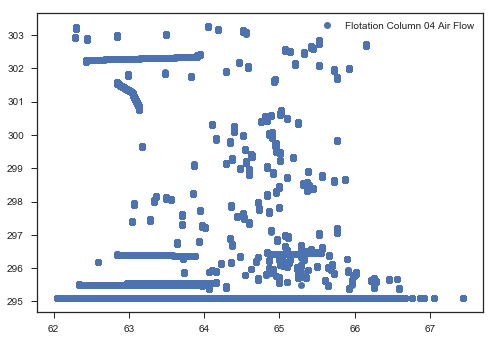

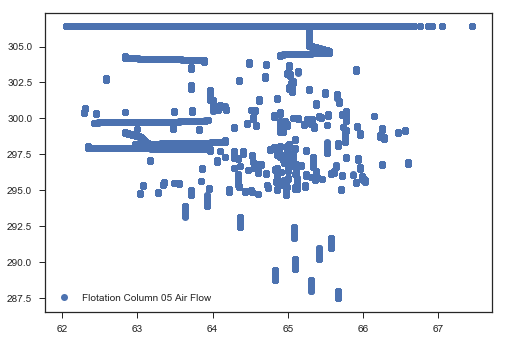

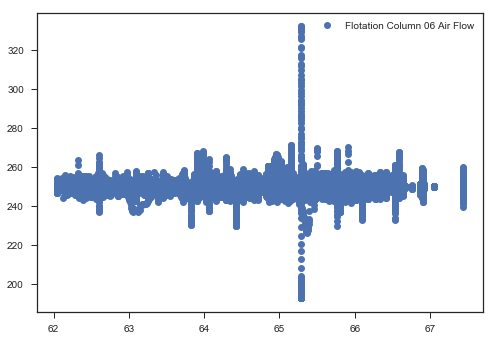

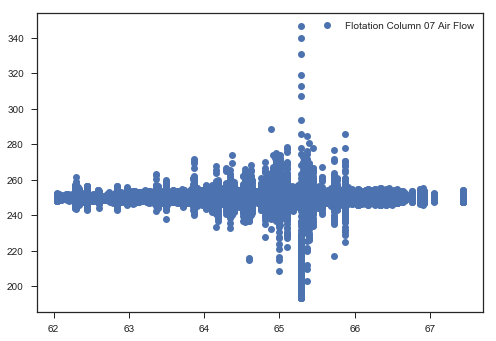

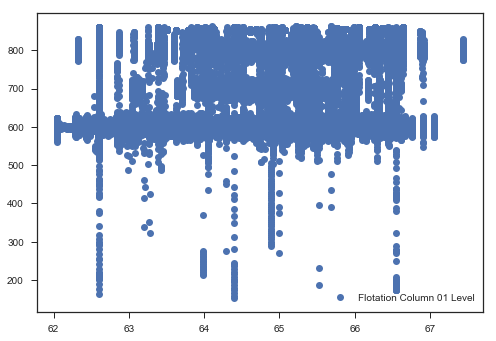

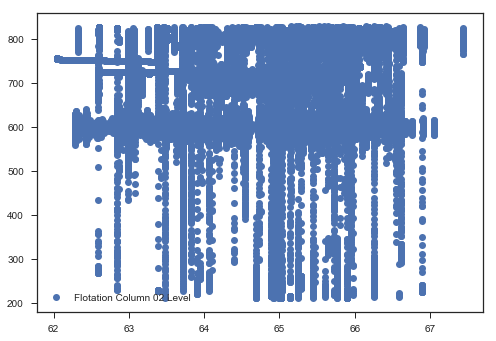

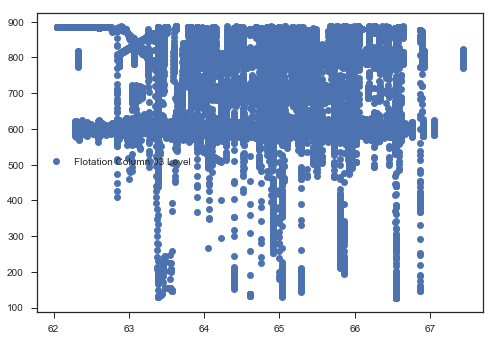

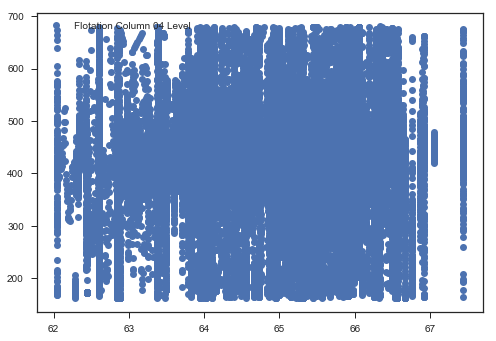

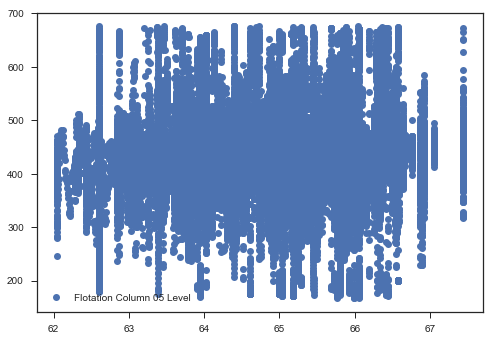

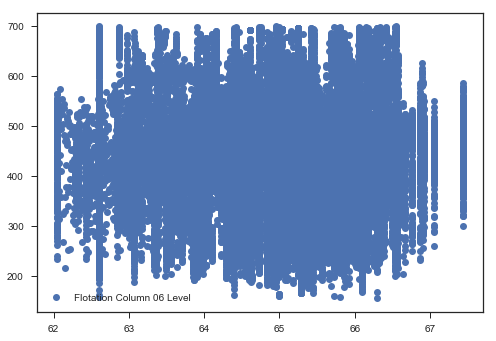

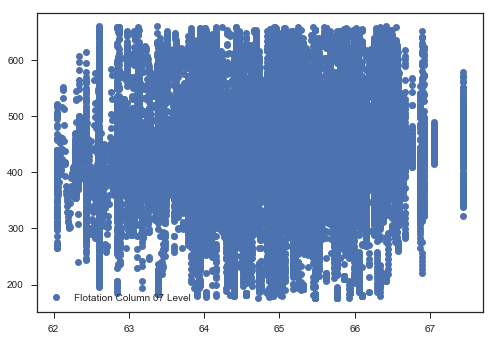

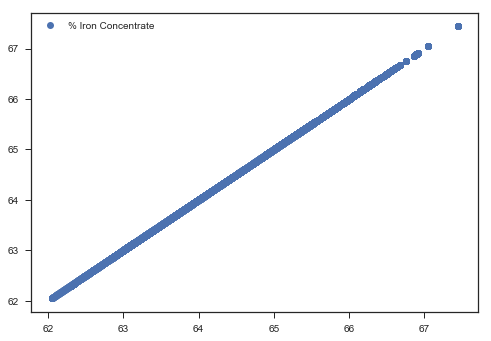

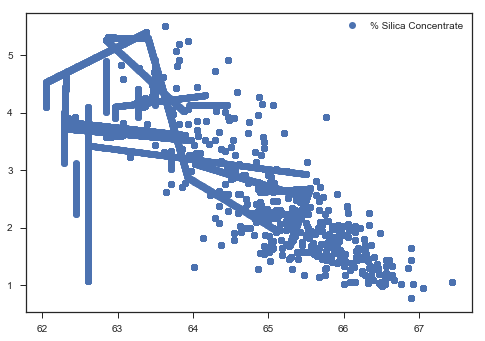

In [47]:
for i in range(1,24):
    plt.figure()
    plt.plot(df2[df2.columns[22]],df2[df2.columns[i]],'o')
    plt.legend()

# %Silica concentrate vs different attributes

F:\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


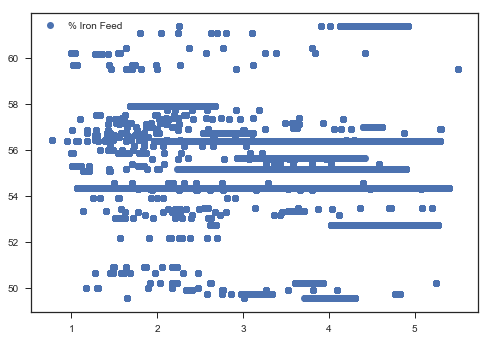

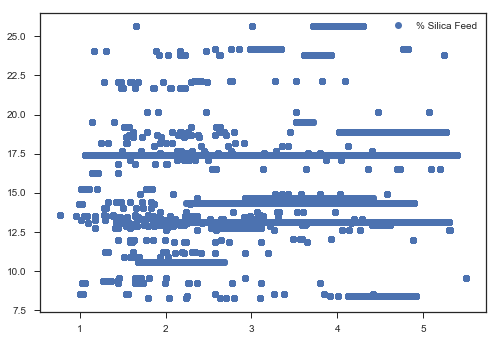

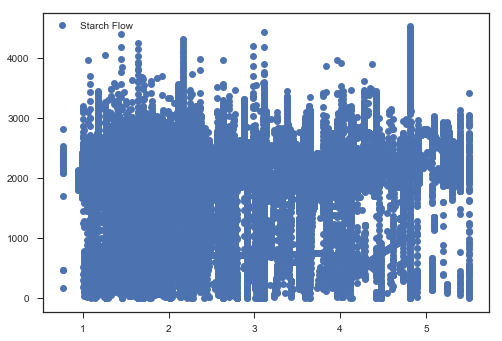

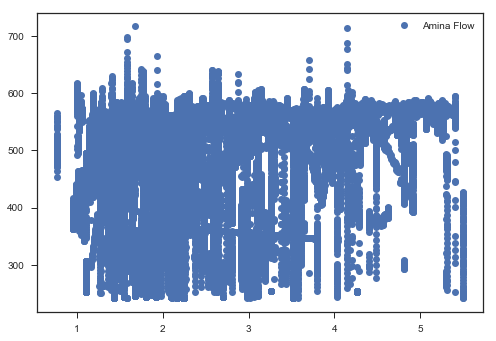

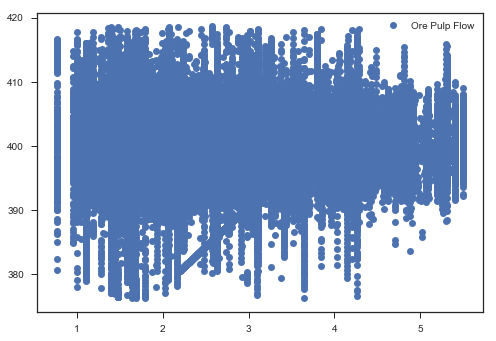

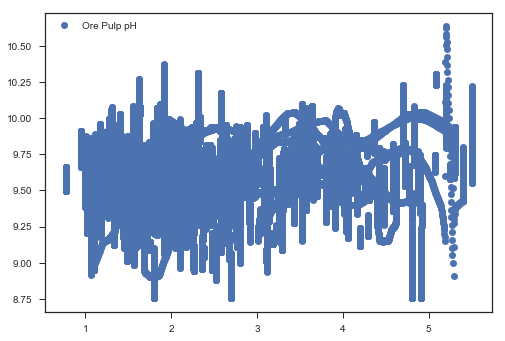

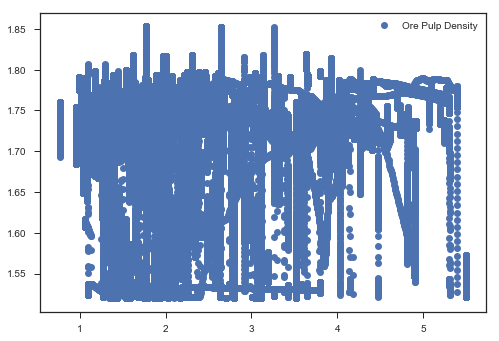

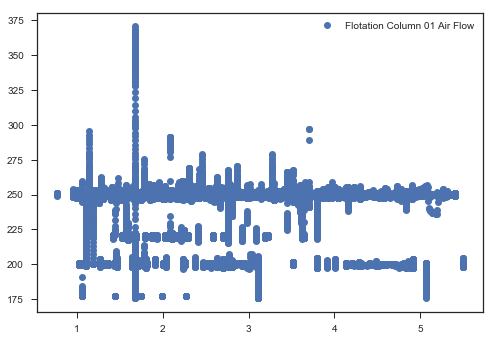

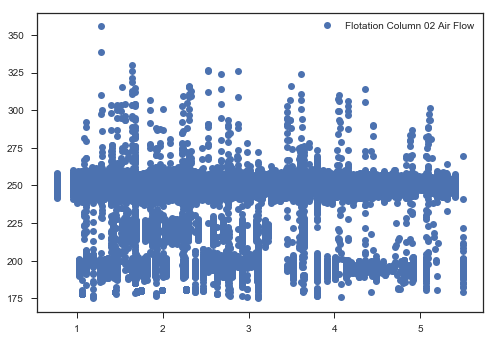

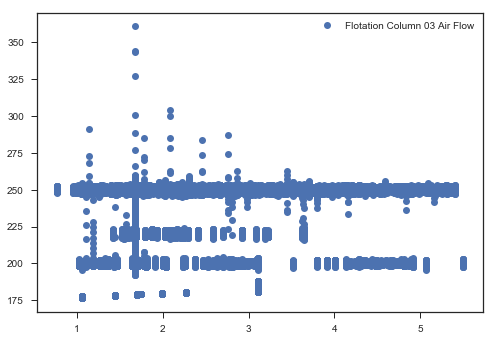

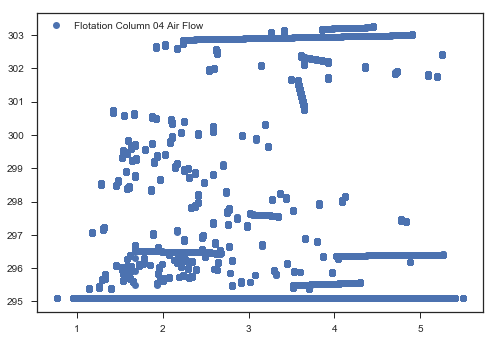

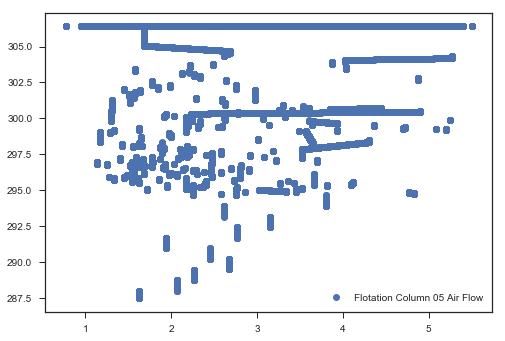

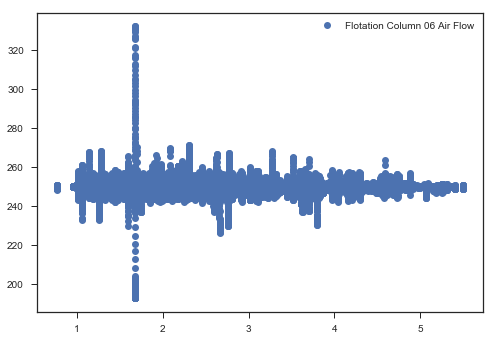

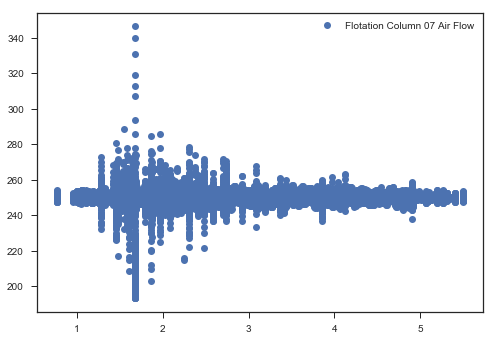

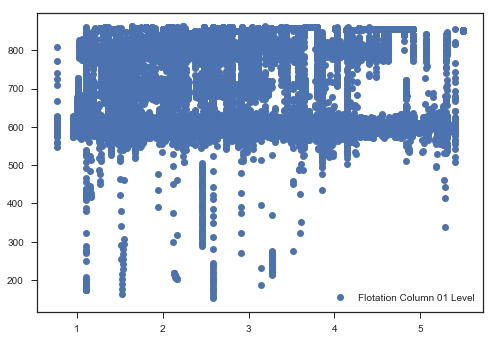

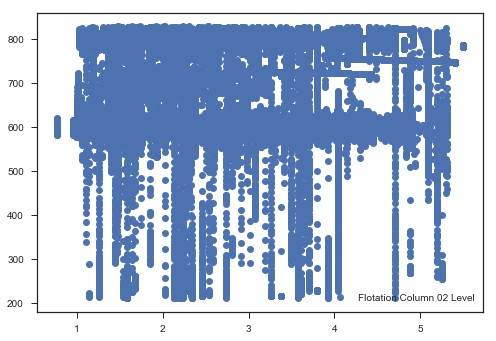

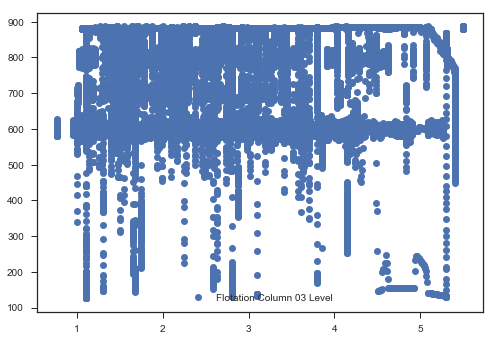

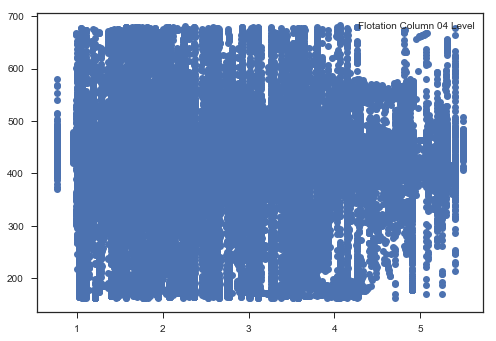

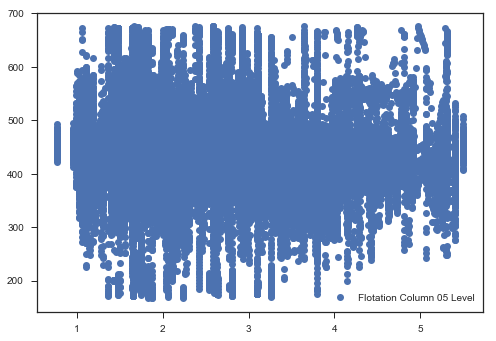

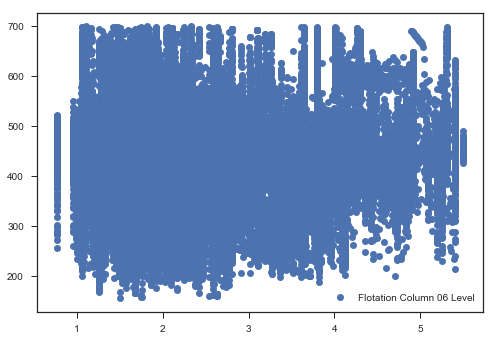

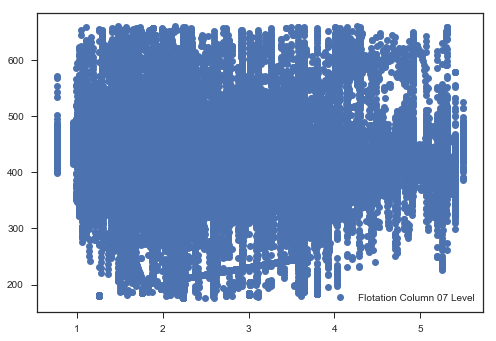

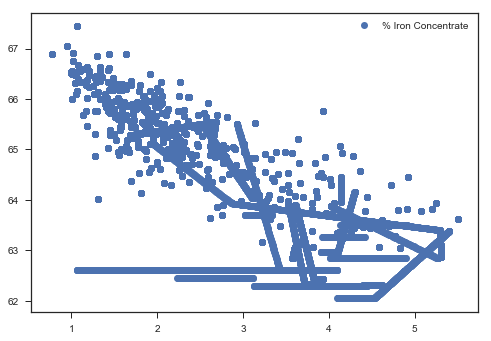

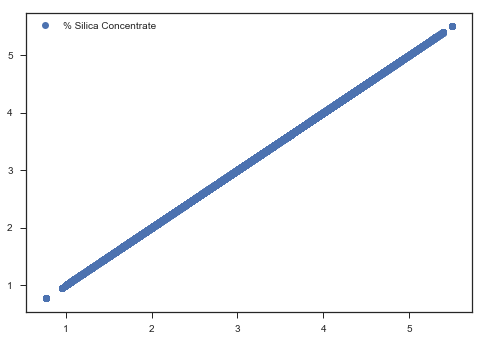

In [49]:
for i in range(1,24):
    plt.figure()
    plt.plot(df2[df2.columns[23]],df2[df2.columns[i]],'o')
    plt.legend()

In [50]:
df2.shape

(100000, 24)

# Multilayer Perceptron

In [53]:
train_size = int(len(df2)*0.7)
test_size = len(df2)-train_size
train,test = df2[0:train_size],df2[train_size:len(df2)]

In [56]:
train.shape

(70000, 24)

In [57]:
test.shape

(30000, 24)

# Autocorrelation

In [58]:
from pandas.tools.plotting import autocorrelation_plot

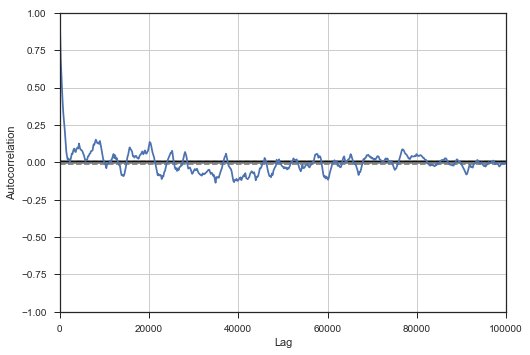

In [60]:
autocorrelation_plot(df2["% Iron Concentrate"])

In [140]:
def create_dataset(dataset,column,look_back=1):
    dataX = dataset[:len(dataset)-look_back][column]
    dataY = dataset[look_back:][column]
    return np.array(dataX),np.array(dataY)

In [141]:
trainX,trainY = create_dataset(train,"% Iron Concentrate",2)

In [142]:
testX,testY = create_dataset(test,"% Iron Concentrate",2)

# Multilayer Perceptron model

In [100]:
model = Sequential()
model.add(Dense(8,input_dim=look_back,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=20,batch_size=2,verbose=2)

Epoch 1/20
 - 53s - loss: 0.2066
Epoch 2/20
 - 52s - loss: 0.0113
Epoch 3/20
 - 46s - loss: 0.0110
Epoch 4/20
 - 49s - loss: 0.0110
Epoch 5/20
 - 49s - loss: 0.0106
Epoch 6/20
 - 51s - loss: 0.0105
Epoch 7/20
 - 54s - loss: 0.0104
Epoch 8/20
 - 62s - loss: 0.0104
Epoch 9/20
 - 54s - loss: 0.0105
Epoch 10/20
 - 55s - loss: 0.0105
Epoch 11/20
 - 55s - loss: 0.0105
Epoch 12/20
 - 51s - loss: 0.0103
Epoch 13/20
 - 50s - loss: 0.0104
Epoch 14/20
 - 51s - loss: 0.0104
Epoch 15/20
 - 51s - loss: 0.0104
Epoch 16/20
 - 62s - loss: 0.0104
Epoch 17/20
 - 60s - loss: 0.0105
Epoch 18/20
 - 49s - loss: 0.0105
Epoch 19/20
 - 47s - loss: 0.0104
Epoch 20/20
 - 47s - loss: 0.0103


In [143]:
trainScore = model.evaluate(trainX,trainY,verbose=0)

In [144]:
import math
print('Train Score: %.2f MSE (%.2f RMSE)' %(trainScore,math.sqrt(trainScore)))

Train Score: 0.01 MSE (0.08 RMSE)


In [145]:
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Test Score: 0.01 MSE (0.08 RMSE)


In [146]:
trainPredict = model.predict(trainX)

In [147]:
testPredict = model.predict(testX)

In [148]:
print(testX.shape)
print(testPredict.shape)

(29998,)
(29998, 1)


In [149]:
type(testX)

numpy.ndarray

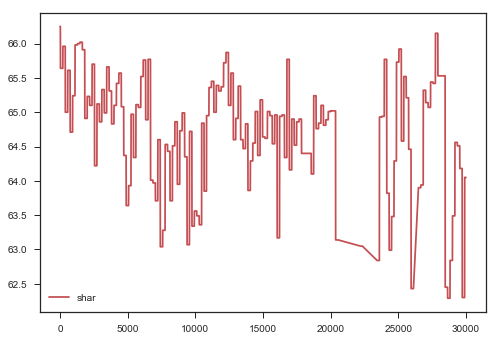

In [153]:
plt.plot(testX,'r',label='shar')
# plt.plot(testPredict,'b',label='par')
plt.legend()
# plt.show()

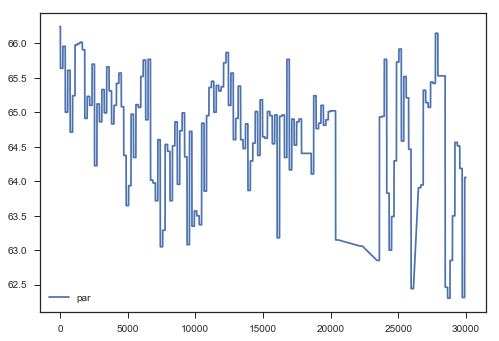

In [154]:
# plt.plot(testX,'r',label='shar')
plt.plot(testPredict,'b',label='par')
plt.legend()
# plt.show()

In [156]:
data.head()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
2017-03-10 01:00:00,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


In [157]:
data.tail()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
date,,,,,,,,,,,,,,,,,,,,,
2017-09-09 23:00:00,2017-09-09 23:00:00,49.75,23.2,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
2017-09-09 23:00:00,2017-09-09 23:00:00,49.75,23.2,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
2017-09-09 23:00:00,2017-09-09 23:00:00,49.75,23.2,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
2017-09-09 23:00:00,2017-09-09 23:00:00,49.75,23.2,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71
2017-09-09 23:00:00,2017-09-09 23:00:00,49.75,23.2,1164.12,468.019,384.801,9.61497,1.65310,300.355,292.865,...,308.115,413.754,514.143,881.323,378.969,500.100,374.354,441.182,64.27,1.71
